In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_sale_megamal.csv', header=None)
columns = ['date', 'id_prd_to_plc', 'id_br','amount', 'price']
df.columns = columns
df.head()


df['total_price'] = df['price'] * df['amount']


def make_year(column):
    year = column.split('-')[0]
    return int(year)

def make_month(column):
    month = column.split('-')[1]
    return int(month)


def make_day(column):
    day = column.split('-')[2][0:2]
    return int(day)

def make_date(column):
    date = column.split(" ")[0]
    return date

df['year'] = df['date'].apply(make_year)
df['month'] = df['date'].apply(make_month)
df['day'] = df['date'].apply(make_day)
df['date'] = df['date'].apply(make_date)

def convert_prd(column):
  if column == 401:
    return 1397
  if column == 901:
    return 1398
  if column == 1001:
    return 1399
  if column == 1101:
    return 1400
  if column == 1201:
    return 1401
  elif column == 1301:
    return 1402


df['id_prd_to_plc'] = df['id_prd_to_plc'].apply(convert_prd)
df.head(-5)

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
0,2018-11-17,1397,51238,1.0,880000.0,880000.0,2018,11,17
1,2018-11-17,1397,51238,1.0,770000.0,770000.0,2018,11,17
2,2018-11-17,1397,51238,1.0,2980000.0,2980000.0,2018,11,17
3,2018-11-17,1397,51238,1.0,1180000.0,1180000.0,2018,11,17
4,2018-11-17,1397,51238,1.0,3850000.0,3850000.0,2018,11,17
...,...,...,...,...,...,...,...,...,...
31795,2023-08-27,1402,51238,1.0,17000000.0,17000000.0,2023,8,27
31796,2023-08-27,1402,51238,1.0,15000000.0,15000000.0,2023,8,27
31797,2023-08-27,1402,51238,1.0,9840000.0,9840000.0,2023,8,27
31798,2023-08-27,1402,51238,1.0,13600000.0,13600000.0,2023,8,27


In [3]:
df['date'] = df['date'] +'-'+ df['id_prd_to_plc'].astype(str)

In [4]:
new_data = df.groupby(df['date'], as_index=False).sum(numeric_only=True)
new_data['id_br'] = 51238
# new_data = new_data.drop('id_inv', axis=1)
new_data.head()

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
0,2018-11-17-1397,205359,51238,156.0,258920000.0,268390000.0,296646,1617,2499
1,2018-11-18-1397,8382,51238,6.0,10490000.0,10490000.0,12108,66,108
2,2018-11-19-1397,6985,51238,5.0,8380000.0,8380000.0,10090,55,95
3,2018-11-20-1397,8382,51238,6.0,17240000.0,17240000.0,12108,66,120
4,2018-11-21-1397,16764,51238,13.0,16860000.0,18090000.0,24216,132,252


In [5]:
def make_prd(column):
  id_prd = column.split('-')[3]
  return int(id_prd)

new_data['id_br'] = new_data['id_br'].astype(int)
new_data = new_data.drop(['year', 'month', 'day'], axis=1)
new_data['year'] = new_data['date'].apply(make_year)
new_data['month'] = new_data['date'].apply(make_month)
new_data['day'] = new_data['date'].apply(make_day)
new_data['id_prd_to_plc'] = new_data['date'].apply(make_prd)

In [6]:
new_data.head()

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
0,2018-11-17-1397,1397,51238,156.0,258920000.0,268390000.0,2018,11,17
1,2018-11-18-1397,1397,51238,6.0,10490000.0,10490000.0,2018,11,18
2,2018-11-19-1397,1397,51238,5.0,8380000.0,8380000.0,2018,11,19
3,2018-11-20-1397,1397,51238,6.0,17240000.0,17240000.0,2018,11,20
4,2018-11-21-1397,1397,51238,13.0,16860000.0,18090000.0,2018,11,21


In [7]:
X = new_data[['id_prd_to_plc', 'year', 'month', 'day']]
y = new_data['total_price']

<Axes: >

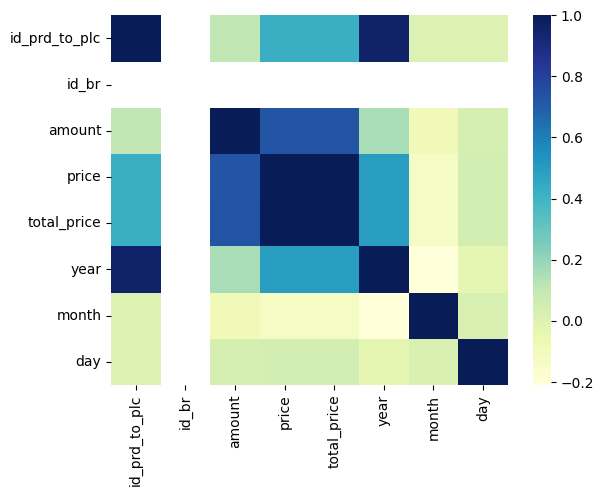

In [8]:
sns.heatmap(new_data.drop("date", axis=1).corr(), cmap='YlGnBu')

## Normalize data

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Learn Catboost Model

In [54]:
import catboost as cb

In [55]:
train_dataset = cb.Pool(X_train, y_train)
test_dataset = cb.Pool(X_test, y_test)

In [57]:
# Define the CatBoostRegressor model
modelCAT = cb.CatBoostRegressor(iterations=20000,  # Number of boosting iterations
                          learning_rate=0.001,  # Learning rate
                          depth=14,  # Depth of the trees
                          loss_function='RMSE',  # Loss function for regression
                          verbose=100)  # Print progress every 100 iterations

# Create a Pool object for training data
train_pool = cb.Pool(data=X_train, label=y_train)

# Fit the CatBoost model to the training data
modelCAT.fit(train_pool)

# Make predictions on the test data
test_predictions = modelCAT.predict(X_test)

# Evaluate the model's performance (you can use appropriate metrics)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, test_predictions)
print(f"Mean Squared Error: {mse}")

0:	learn: 100614565.0160535	total: 183ms	remaining: 1h 49s
100:	learn: 97497797.6453506	total: 1.29s	remaining: 4m 14s
200:	learn: 94722828.5329021	total: 2.38s	remaining: 3m 54s
300:	learn: 92228825.7611900	total: 3.47s	remaining: 3m 47s
400:	learn: 89957695.9124074	total: 4.81s	remaining: 3m 55s
500:	learn: 87979223.5831452	total: 5.86s	remaining: 3m 48s
600:	learn: 86178311.4663954	total: 6.98s	remaining: 3m 45s
700:	learn: 84542634.3549044	total: 8.19s	remaining: 3m 45s
800:	learn: 83126410.1981881	total: 9.34s	remaining: 3m 43s
900:	learn: 81739260.4279214	total: 10.8s	remaining: 3m 48s
1000:	learn: 80433736.4197145	total: 12.3s	remaining: 3m 54s
1100:	learn: 79276633.9169867	total: 13.6s	remaining: 3m 53s
1200:	learn: 78156407.1933851	total: 15.2s	remaining: 3m 57s
1300:	learn: 77154699.7157159	total: 16.7s	remaining: 4m
1400:	learn: 76260300.0819750	total: 18.1s	remaining: 4m
1500:	learn: 75360110.2265828	total: 19.6s	remaining: 4m 1s
1600:	learn: 74579094.3583436	total: 21.2s	r

In [58]:
y_preds = modelCAT.predict(X_test)
y_test[:5], y_preds[:5]

(135      17620000.0
 1281    122505000.0
 1117     31000000.0
 998      33900000.0
 808      63710000.0
 Name: total_price, dtype: float64,
 array([2.13696852e+07, 1.27552091e+08, 4.29255511e+07, 4.75106476e+07,
        7.39229058e+07]))

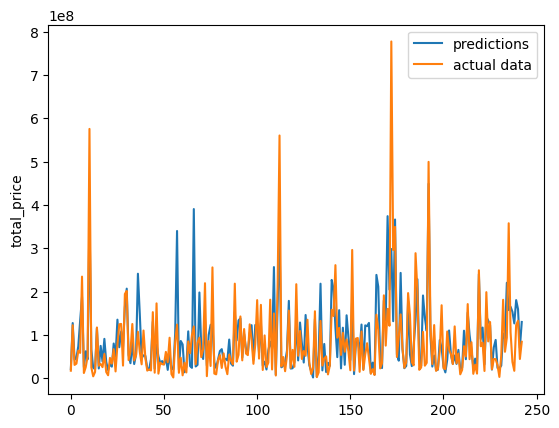

In [59]:
sns.lineplot(x=range(243), y=y_preds, label='predictions')
sns.lineplot(x=range(243), y=y_test, label='actual data')
plt.legend()

In [60]:
from sklearn.metrics import mean_squared_error as MSE

In [61]:
error = MSE(y_preds, y_test)
np.sqrt(error)

66008866.76735544

model version 1 : np.sqrt(error) = 66008866

In [78]:
month = new_data.iloc[1436:1466]
month.head()

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
1436,2023-02-28-1401,1401,51238,18.0,170640000.0,170640000.0,2023,2,28
1437,2023-03-01-1401,1401,51238,11.0,78850000.0,78850000.0,2023,3,1
1438,2023-03-02-1401,1401,51238,42.0,357770000.0,357770000.0,2023,3,2
1439,2023-03-03-1401,1401,51238,41.0,295920000.0,295920000.0,2023,3,3
1440,2023-03-04-1401,1401,51238,11.0,70930000.0,70930000.0,2023,3,4


RMSE: 61363482.25507234


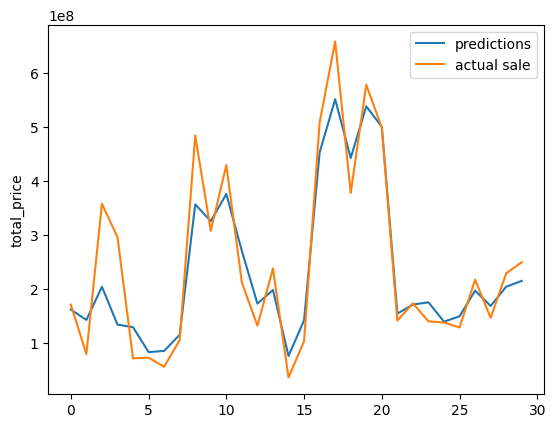

In [79]:
x_month = month[['id_prd_to_plc', 'year', 'month', 'day']]
x_month = scaler.transform(x_month)
sale_predict = model.predict(x_month)
actual_sale = month['total_price']
lenght = len(sale_predict)
sns.lineplot(x=range(lenght), y=sale_predict, label='predictions')
sns.lineplot(x=range(lenght), y=actual_sale, label='actual sale')
error = np.sqrt(MSE(actual_sale, sale_predict))
print(f"RMSE: {error}")
plt.legend()

RMSE: 61630842.83622479


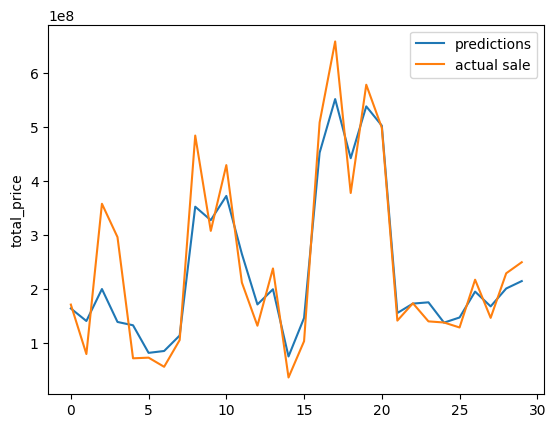

In [80]:
x_month = month[['id_prd_to_plc', 'year', 'month', 'day']]
x_month = scaler.transform(x_month)
sale_predict = modelRFR.predict(x_month)
actual_sale = month['total_price']
lenght = len(sale_predict)
sns.lineplot(x=range(lenght), y=sale_predict, label='predictions')
sns.lineplot(x=range(lenght), y=actual_sale, label='actual sale')
error = np.sqrt(MSE(actual_sale, sale_predict))
print(f"RMSE: {error}")
plt.legend()

In [77]:
sum_actual_sale = month['total_price'].sum()
sum_predict_sale = sale_predict.sum()
print(f"Actual sale:    {sum_actual_sale}")
print(f"Predicted sale: {sum_predict_sale}")
print(f"Act-pred:      {sum_actual_sale-sum_predict_sale:.0f}")

Actual sale:    3476780000.0
Predicted sale: 3391483627.0
Act-pred:      85296373


In [ ]:
# After you train the model using fit(), save like this - 
model.save_model('model_name')    # extension not required.

# And then, later load - 
from catboost import CatBoostClassifier
model = CatBoostClassifier()      # parameters not required.
model.load_model('model_name')

# Now, try predict().

## Random Forrest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [15]:
modelRFR = RandomForestRegressor(n_estimators=2000)
modelRFR.fit(X_train, y_train)

RandomForestRegressor(n_estimators=2000)

In [17]:
modelSVR = SVR()
modelSVR.fit(X_train, y_train)

SVR()

In [18]:
modelGBR = GradientBoostingRegressor(n_estimators=2000)
modelGBR.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=2000)

In [48]:
from sklearn.metrics import mean_squared_error
preds_rfr = modelRFR.predict(X_test)
preds_svr = modelSVR.predict(X_test)
preds_gbr = modelGBR.predict(X_test)

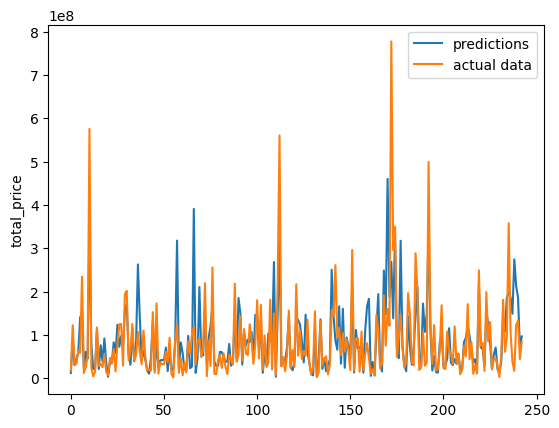

In [50]:
sns.lineplot(x=range(len(preds_rfr)), y=preds_rfr, label='predictions')
sns.lineplot(x=range(len(preds_rfr)), y=y_test, label='actual data')
plt.legend()

In [52]:
error = mean_squared_error(preds_rfr, y_test)
np.sqrt(error)

71316209.99993825

In [20]:
from sklearn.metrics import mean_squared_error
print(f"RFR: {mean_squared_error(y_test, preds_rfr)}")
print(f"SVR: {mean_squared_error(y_test, preds_svr)}")
print(f"GBR: {mean_squared_error(y_test, preds_gbr)}")

RFR: 5086001808755293.0
SVR: 9992389697425924.0
GBR: 6302168111724719.0


In [22]:
print(f"RFR: {np.sqrt(mean_squared_error(y_test, preds_rfr))}")
print(f"SVR: {np.sqrt(mean_squared_error(y_test, preds_svr))}")
print(f"GBR: {np.sqrt(mean_squared_error(y_test, preds_gbr))}")

RFR: 71316209.99993825
SVR: 99961941.24478538
GBR: 79386195.97716418


In [38]:
month = new_data.iloc[1496:1557]
month

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
1496,2023-05-01-1402,1402,51238,11.0,77440000.0,77440000.0,2023,5,1
1497,2023-05-02-1402,1402,51238,6.0,58700000.0,58700000.0,2023,5,2
1498,2023-05-03-1402,1402,51238,12.0,92270000.0,92270000.0,2023,5,3
1499,2023-05-04-1402,1402,51238,6.0,52700000.0,52700000.0,2023,5,4
1500,2023-05-05-1402,1402,51238,17.0,102060000.0,110310000.0,2023,5,5
...,...,...,...,...,...,...,...,...,...
1552,2023-06-26-1402,1402,51238,13.0,97720000.0,97720000.0,2023,6,26
1553,2023-06-27-1402,1402,51238,26.0,166115000.0,171515000.0,2023,6,27
1554,2023-06-28-1402,1402,51238,24.0,167450000.0,167450000.0,2023,6,28
1555,2023-06-29-1402,1402,51238,31.0,184670000.0,184670000.0,2023,6,29


RMSE: 28974619.194714762


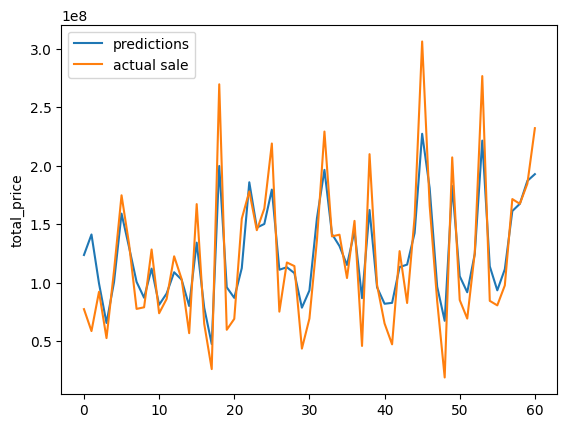

In [46]:
x_month = month[['id_prd_to_plc', 'year', 'month', 'day']]
x_month = scaler.transform(x_month)
sale_predict = modelRFR.predict(x_month)
actual_sale = month['total_price']
lenght = len(sale_predict)
sns.lineplot(x=range(lenght), y=sale_predict, label='predictions')
sns.lineplot(x=range(lenght), y=actual_sale, label='actual sale')
error = np.sqrt(mean_squared_error(actual_sale, sale_predict))
print(f"RMSE: {error}")
plt.legend()

In [82]:
sum_actual_sale = month['total_price'].sum()
sum_predict_sale = sale_predict.sum()
print(f"Actual sale:    {sum_actual_sale}")
print(f"Predicted sale: {sum_predict_sale}")
print(f"Act-pred:      {sum_actual_sale-sum_predict_sale:.0f}")

Actual sale:    7329470000.0
Predicted sale: 7010941755.0
Act-pred:      318528245


In [81]:
import pickle

filename_scaler = "megamal_scaler.pickle"
filename_model = "megamal_predictor.pickle"

pickle.dump(scaler, open(filename_scaler, "wb"))
pickle.dump(modelRFR, open(filename_model, "wb"))

In [42]:
# load model
loaded_model = pickle.load(open(filename, "rb"))